In [113]:
import networkx as nx
import matplotlib.pyplot as plt

### 1、Creating a graph

In [34]:
G = nx.Graph()

### 2、Nodes

In [35]:
G.add_node(1)

In [36]:
G.add_nodes_from([2, 3])

In [7]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [18]:
G.add_node(H)

### 3、Edges

In [37]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [38]:
G.add_edges_from([(1, 2), (1, 3)])

In [40]:
G.add_edges_from(H.edges)

In [42]:
G.clear()

In [44]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [46]:
G.number_of_nodes()

8

In [47]:
G.number_of_edges()

3

In [48]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [49]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [50]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [51]:
G.degree[1]  # the number of edges incident to 1

2

In [53]:
G.edges([1, 'm'])

EdgeDataView([(1, 2), (1, 3), ('m', 3)])

In [54]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

In [55]:
G.remove_node(2)

In [57]:
G.remove_nodes_from("spam")

In [59]:
G.remove_edge(1, 3)

In [61]:
G.add_edge(1, 2)

In [63]:
H = nx.DiGraph(G)

In [65]:
edgelist = [(0, 1), (1, 2), (2, 3)]

In [69]:
H = nx.Graph(edgelist)

### 4、Accessing edges and neighbors

In [68]:
G[1]

AtlasView({2: {}})

In [70]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

In [73]:
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [74]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


### 5、Adding attributes to graphs, nodes, and edges

#### Graph attributes

In [79]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

#### Node attributes

In [80]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [81]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

#### Edge Attributes

In [83]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

### 6、Directed graphs

In [88]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (1, 4, 0.2), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.7

In [89]:
DG.degree(1, weight='weight')

1.45

In [91]:
list(DG.successors(1))

[2, 4]

In [92]:
list(DG.neighbors(1))

[2, 4]

In [97]:
H = nx.Graph(DG)  # convert G to undirected graph

### 7、Multigraphs

In [101]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [103]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

### 8、Analyzing graphs

In [105]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [107]:
G.degree()

DegreeView({1: 2, 2: 1, 3: 1, 'spam': 0})

In [108]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [109]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [110]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

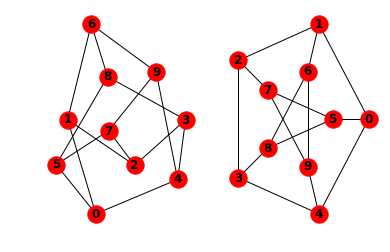

In [114]:
G = nx.petersen_graph()

plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

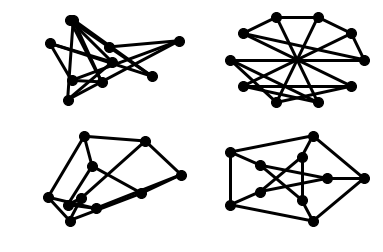

In [115]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)

plt.subplot(222)
nx.draw_circular(G, **options)

plt.subplot(223)
nx.draw_spectral(G, **options)

plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

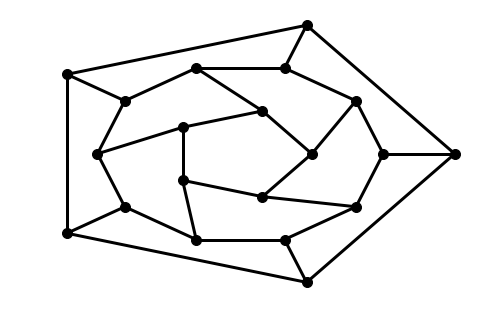

In [116]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

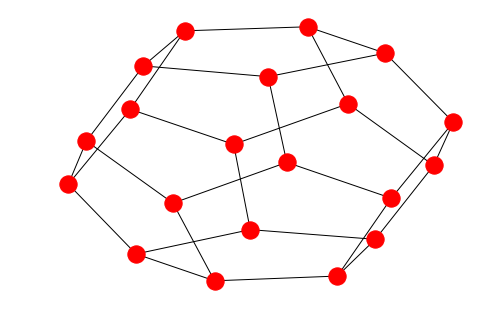

In [117]:
nx.draw(G)
plt.savefig("path.png")

### Draw

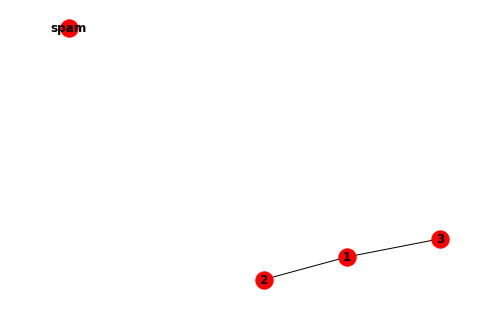

In [106]:
nx.draw(G, with_labels=True, font_weight='bold')